## Group Exercise 1:

1. You clean and jerk 100kg in a weightlifting competition. The mean C&J weight at the competition is 100kg. What's your z-score for the C&J?
2. You snatch 100kg in the same competition. The mean snatch weight is 80kg with a standard deviation of 10kg. What's your z-score for the snatch?
3. In olympic weightlifting, your overall score is the sum total of your C&J and snatch weights. The mean of these totals across competitors is 180kg with a standard deviation of 5kg. What's your overall z-score in the competition?

**Solutions**
1. zero
2. two
3. four (you may have won the meet!)

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

## Group Exercises 2:

1. What are the *p*-values associated with your weightlifting results from the three preceding exercises?
2. With the standard $\alpha = .05$, which of the three weightlifting results are "statistically significant"?


**Solutions**

1a. This result is at the mean, which is also the median for a normal distribution; exactly half of the values are above as they are below. This corresponds to the highest possible $p$-value, $p=1$, because any value in the distribution is guaranteed to be above it or below it:

In [2]:
p_below = st.norm.cdf(0)
p_below

np.float64(0.5)

In [3]:
p_above = 1-st.norm.cdf(0)
p_above

np.float64(0.5)

In [4]:
p_below + p_above

np.float64(1.0)

More generally:

In [5]:
def p_from_z(my_z):
    return 2 * st.norm.cdf(-abs(my_z))

In [6]:
p_from_z(0)

np.float64(1.0)

1b. The probability of a value being below $z = -2$ is:

In [7]:
p_below = st.norm.cdf(-2)
p_below

np.float64(0.0227501319481792)

...and the probability of a value being above $z=2$ is the same:

In [8]:
p_above = 1-st.norm.cdf(2)
p_above

np.float64(0.02275013194817921)

Therefore, the *p*-value -- the probability that a value is below $z=-2$ or above $z=2$ -- is:

In [9]:
p_below + p_above

np.float64(0.04550026389635841)

In [10]:
p_from_z(2)

np.float64(0.0455002638963584)

1c. Following the same calculations as we did for 1b, the *p*-value for an observation 4 standard deviations away from the mean is:

In [11]:
p_from_z(4)

np.float64(6.334248366623973e-05)

...which is about 0.0000633:

In [12]:
0.0000633

6.33e-05

(Incidentally, very small *p* values are often reported as **negative log *P*** values as these are much easier to read...)

In [13]:
-np.log10(6.33e-05)

np.float64(4.198596289982645)

2. The absolute value of the *z*-score for your snatch as well as your combined score is greater than 1.96 so they're both "statistically significant". Your performance on the clean and jerk could not have been less significant!

# Group Exercise 3:
1. You run four additional experiments with your GMO brewing yeast and now have the following eight stout yields: `[48, 50, 54, 60, 49, 55, 59, 62]`. What is the *t*-statistic and is it significantly different from the 50L-yielding baseline process?
2. Does the flipper length of Adélie penguins from Dream island vary significantly by sex?
2. Was the heart rate of low-fat dieters different after one minute of rest relative to after 15 minutes of rest?

**Spoiler alert**: Solutions below

**Solutions**
1. The GMO yeast yields a mean of 54.6L, which is significantly more stout than the baseline process, *t*(7) = 2.45, $p < .05$.

In [17]:
penguins = sns.load_dataset('penguins').dropna() # some rows are missing data
adelie = penguins[penguins.species == 'Adelie']

In [18]:
st.ttest_1samp([48, 50, 54, 60, 49, 55, 59, 62], 50)

TtestResult(statistic=np.float64(2.448085108904054), pvalue=np.float64(0.0442312968303811), df=np.int64(7))

2. On Dream island, the flippers of male Adélie penguins (191.9 mm) are significantly longer than those of females (187.9 mm), *t* = 2.4, *p* < .05.

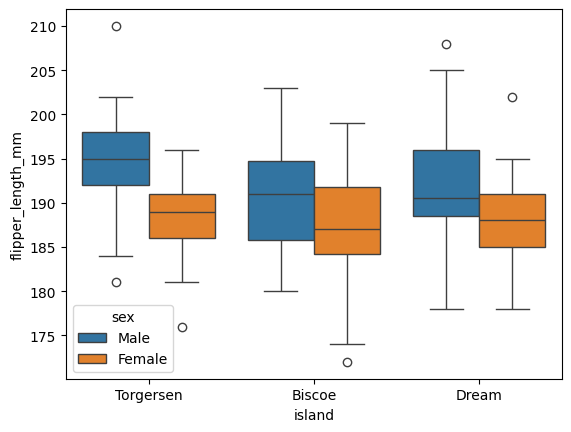

In [19]:
_ = sns.boxplot(x='island', y='flipper_length_mm', hue='sex', data=adelie)

In [20]:
f = adelie[(adelie.sex == 'Female') & (adelie.island == 'Dream')]['flipper_length_mm'].to_numpy()
m = adelie[(adelie.sex == 'Male') & (adelie.island == 'Dream')]['flipper_length_mm'].to_numpy()

In [21]:
f.mean()

np.float64(187.85185185185185)

In [22]:
m.mean()

np.float64(191.92857142857142)

In [23]:
tp = st.ttest_ind(f, m, equal_var=False)
tp

TtestResult(statistic=np.float64(-2.446038619999187), pvalue=np.float64(0.017898599613024185), df=np.float64(51.48552818449215))

In [24]:
tp.pvalue

np.float64(0.017898599613024185)

3. The heart rate of low-fat dieters did not change significantly after one minute of rest (88.6 bpm) relative to after 15 minutes of rest (89.6 bpm), *t*=2.2, *p* = .09.

In [26]:
exercise = sns.load_dataset('exercise')
exercise

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest
...,...,...,...,...,...,...
85,85,29,no fat,135,15 min,running
86,86,29,no fat,130,30 min,running
87,87,30,no fat,99,1 min,running
88,88,30,no fat,111,15 min,running


In [27]:
rest_lo = exercise[(exercise.diet == 'low fat') & (exercise.kind == 'rest')]

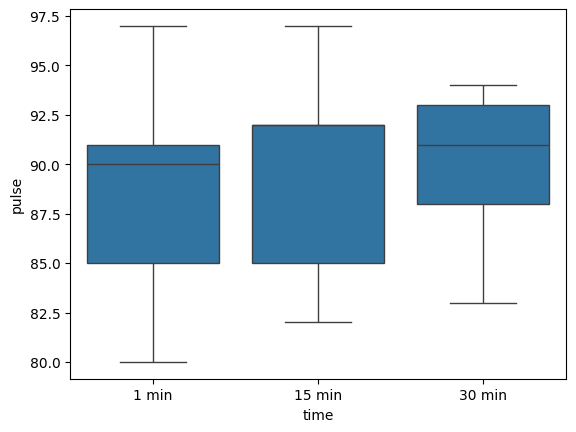

In [28]:
_ = sns.boxplot(x='time', y='pulse', data=rest_lo)

In [29]:
min1 = rest_lo[rest_lo.time == '1 min']['pulse'].to_numpy()
min1.mean()

np.float64(88.6)

In [30]:
min15 = rest_lo[rest_lo.time == '15 min']['pulse'].to_numpy()
min15.mean()

np.float64(89.6)

In [31]:
st.ttest_rel(min15, min1)

TtestResult(statistic=np.float64(2.23606797749979), pvalue=np.float64(0.08900934250008564), df=np.int64(4))